# Проект: Гипотезы для увеличения выручки интернет магазина

**Описание данных:**


****Данные для первой части****



**Файл `/datasets/hypothesis.csv`**

`Hypothesis` — краткое описание гипотезы;

`Reach` — охват пользователей по 10-балльной шкале;

`Impact` — влияние на пользователей по 10-балльной шкале;

`Confidence` — уверенность в гипотезе по 10-балльной шкале;

`Efforts` — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


****Данные для второй части****


**Файл `/datasets/orders.csv`**



`transactionId` — идентификатор заказа;

`visitorId` — идентификатор пользователя, совершившего заказ;

`date` — дата, когда был совершён заказ;

`revenue` — выручка заказа;

`group` — группа A/B-теста, в которую попал заказ.


**Файл `/datasets/visitors.csv`**


`date` — дата;

`group `— группа A/B-теста;

`visitors` — количество пользователей в указанную дату в указанной группе A/B-теста

**Цель проекта:**

Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.


# Часть 1. Приоритизация гипотез.

#### **Импортируем библиотеки**

In [1]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
from scipy import stats as st
import scipy.stats as stats
from pandas.plotting import register_matplotlib_converters
import warnings
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)
from IPython.display import display, HTML
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [3]:
pd.options.display.max_colwidth = 130
data.head(15)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


#### Приведём названия столбцов к нижнему регистру

In [4]:
data.columns = data.columns.str.lower()
data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


#### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [5]:
data['ICE'] = round(data['impact']*data['confidence']/data['efforts'], 2)
data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending= False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.330
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.330
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.120
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


**В итоге, топ 3 гипотезы:**
   * "Запустить акцию, дающую скидку на товар в день рождения"
   * "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"
   * "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"

#### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

In [6]:
data['ICE'] = round(data['reach']*data['impact']*data['confidence']/data['efforts'], 2)
data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending= False)

,hypothesis,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000


**По фреймворку RICE приорететнее оказались гипотезы:**

* "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок"
* "Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа"
* "Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей"

**Итог:**

Параметр охвата (**Reach**), использующийся в методе **RICE** изменил всю приоритетность, полученную по методу **ICE**:

* без учета охвата на первом месте идет акция со скидкой имениннику, но параметр **Reach** справедливо понизил приоритет этой акции, т.к. и правда, охват её минимальный (по сравнению с другими гипотезами увеличения выручки);

* также произошло и с гипотезой о добавлении 2х каналов трафика, с организацией своей службы доставки и с идеей о добавлении страницы отзывов;

* без изменений осталась рейтинговая позиция гипотез о добавлении баннеров с актуальными акциями на главную страницу и идея с изменением цвета фона главной страницы);

* выросли в рейтинге (стали более приоритетными) **RICE** (по сравнению с **ICE**) гипотеза о добавлении формы подписки на все основные страницы ресурса, о добавлении блоков рекомендаций товаров и предложение об изменении структуры категорий.

# Часть 2. Анализ A/B-теста.

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [8]:
orders.head(15)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [9]:
visitors.head(15)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


**Проверим наличие дубликатов**

In [12]:
orders.duplicated().sum()

0

In [13]:
visitors.duplicated().sum()

0

**Приведём столбцы к фармату datetime:**

In [14]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)
visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

In [15]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [16]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


**Создаем массив уникальных пар значений дат и групп теста**

In [17]:
datesGroups = orders[['date','group']].drop_duplicates()
#получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
#получаем агрегированные кумулятивные по дням данные о посетителях
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])
#объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData.head(5))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845


### График кумулятивной выручки по группам.

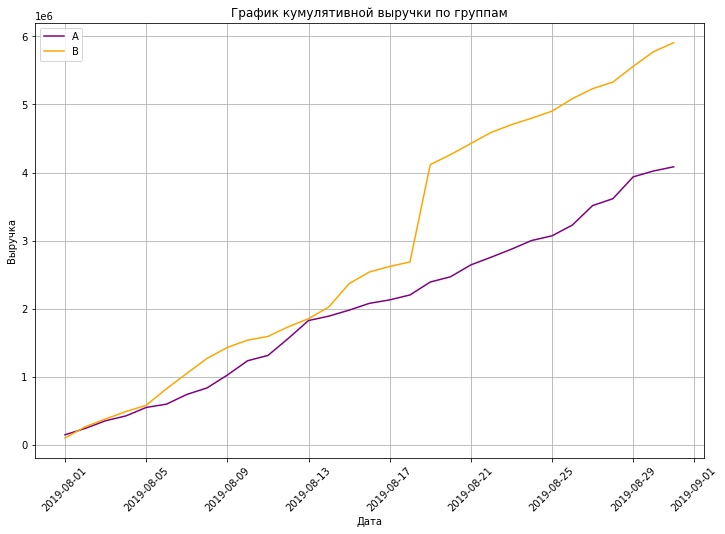

In [18]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(12, 8))
# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A', color = "purple")

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', color ='orange')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()

plt.xticks(rotation=45)
plt.legend(); 

До середины теста выручка распределялась **равномерно** между группами. После выручка **группы B** заметно вырвалась вперед, скорее всего, это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов.

### График кумулятивного среднего чека по группам.

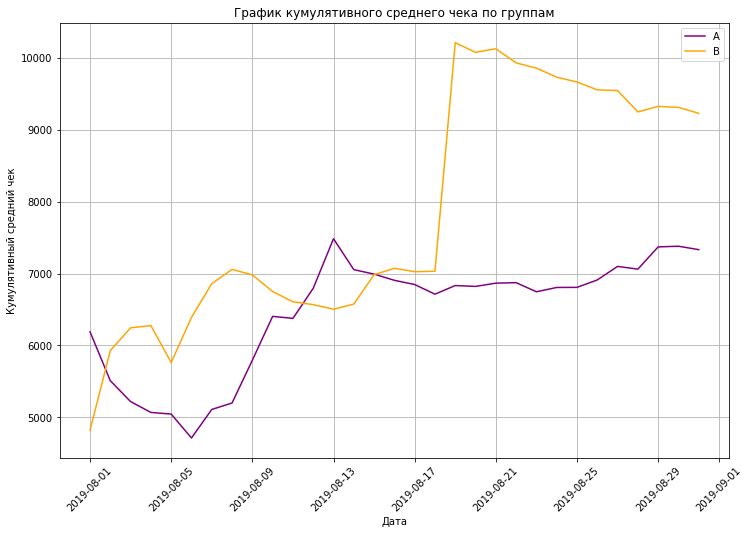

In [19]:
plt.figure(figsize=(12, 8))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A', color = "purple")
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B', color ='orange')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивный cредний чек')
plt.grid()
plt.legend()


plt.xticks(rotation=45);
plt.show()

Кумулятивный средний чек **группы А** имеет более плавный график, в отличии от **группы B**

Кумулятивный средний чек **группы B** имеет аномальный рост в середине теста(**примерно 18 августа**). Скорее всего, в эту дату произошли очень крупные покупки.

Кумулятивное значение среднего чека каждой группы стабилизируется к концу теста.

### График относительного изменения кумулятивного среднего чека группы B к группе A.

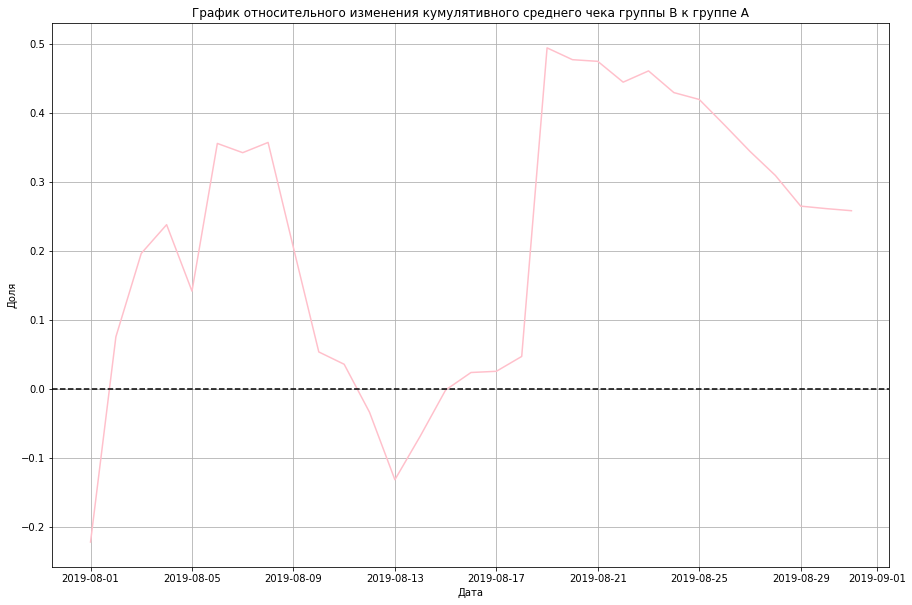

In [20]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15, 10))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1, color = 'pink')
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Доля')
plt.grid()
plt.show()

Видны резкие изменения **среднего чека**, скорее всего, в этих моментах были совершены аномальные заказы.

### График кумулятивного среднего количества заказов на посетителя по группам.

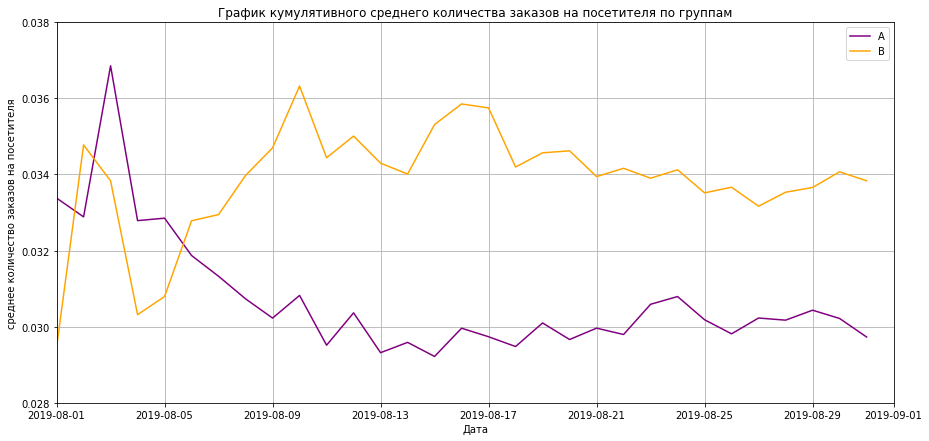

In [21]:
# считаем кумулятивную среднего количества заказов на посетителя по группам
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15, 7))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A', color = "purple")
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B', color ='orange')
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.028, 0.038])
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('среднее количество заказов на посетителя')
plt.legend()
plt.grid()
plt.show()

Среднее количество заказов сначала увеличивалось для обеих групп. Далее, количество сокращается для **группы А** и стабилизируется на определенном диапазоне. В конце, есть некоторый спад. У **группы В** наоборот, идет восстановление количества заказов (либо качества). Выходя на определенный диапазон, количество заказов по продолжению теста начинает понемногу идти на спад. В конце есть небольшой выход вверх и далее небольшое падение.

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

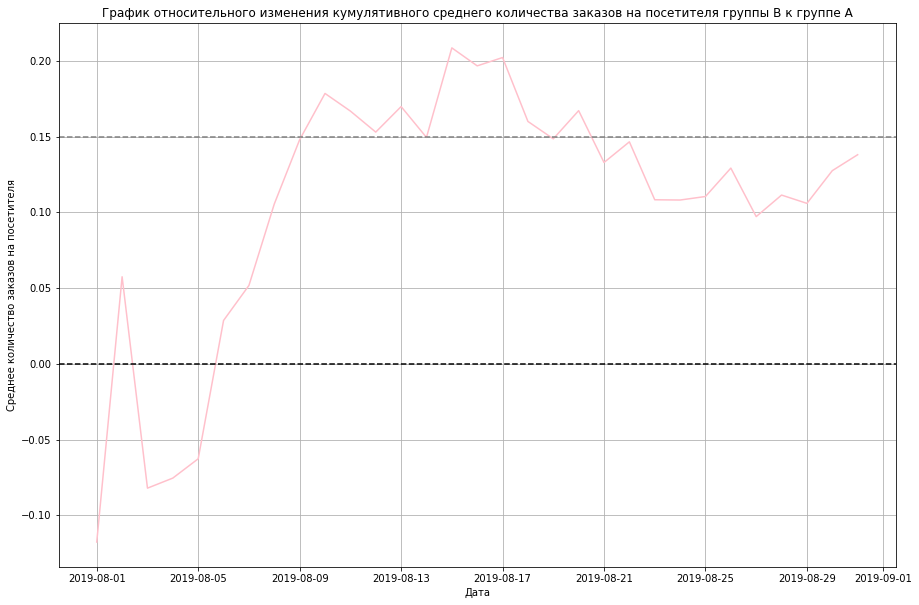

In [22]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
#строим график
plt.figure(figsize=(15, 10))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A", color = 'pink')
# добавляем оси
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Среднее количество заказов на посетителя')
plt.grid()
plt.show()

По графику видно, что **группа B** выходит вперед после **5-го дня** теста и лидирует с преимуществом примерно **15% до конца теста**.

### Точечный график количества заказов по пользователям.

In [23]:
#Подсчитаем количество заказов по пользователям 
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'transactionId']

print(ordersByUsers.sort_values(by='transactionId', ascending=False).head(15))

       visitorId  transactionId
1023  4256040402             11
591   2458001652             11
569   2378935119              9
487   2038680547              8
44     199603092              5
744   3062433592              5
55     237748145              5
917   3803269165              5
299   1230306981              5
897   3717692402              5
393   1614305549              4
114    457167155              4
619   2587333274              4
340   1404934699              3
937   3908431265              3


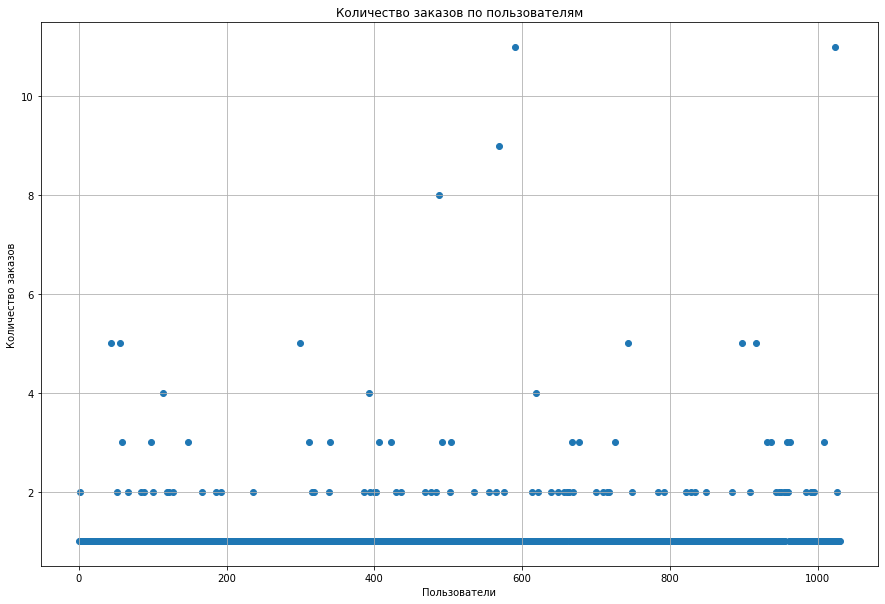

In [24]:
#Строим график
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.figure(figsize=(15, 10))
plt.scatter(x_values, ordersByUsers['transactionId'])
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.title("Количество заказов по пользователям")
plt.grid()
plt.show()

Пользователей которые сделали заказ **более 2 раз** немного. Они вполне могут быть аномальными

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя.

In [25]:
print(np.percentile(ordersByUsers['transactionId'], [95, 99]))

[2. 4.]


Не более **5%** пользователей оформляли **больше 2х заказов**, **1%** пользователей заказывали **больше 4х раз**.

### Точечный график стоимостей заказов.

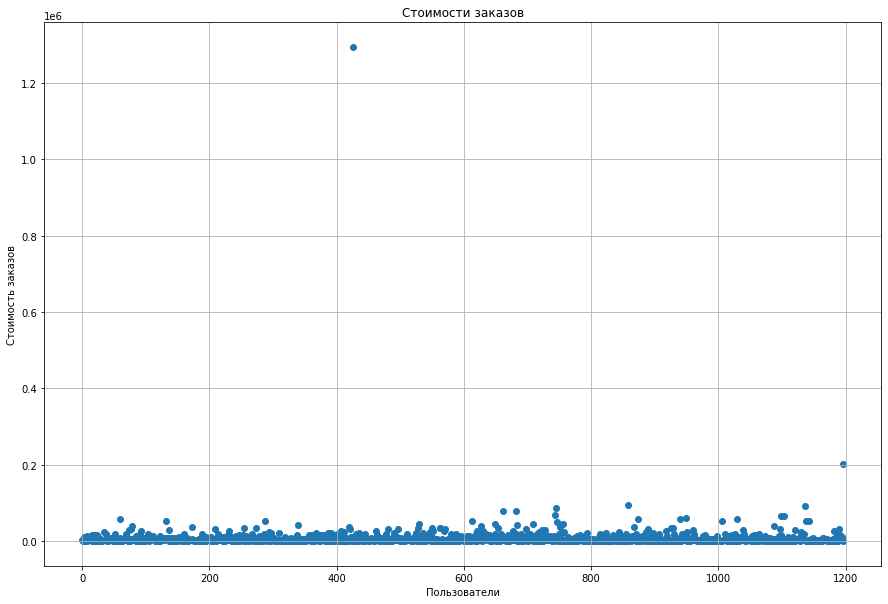

In [26]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.figure(figsize=(15, 10))
plt.scatter(x_values, orders['revenue']) 
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.title("Стоимости заказов")
plt.grid()
plt.show()

На графике видно значения возле **1млн**, **300 тыс** и **200 тыс.** Можно их считать аномальными? Считаем 95-й и 99-й перцентили

### Посчитаем 95-й и 99-й перцентили стоимости заказов.

In [27]:
print(np.percentile(orders['revenue'] , [95, 99]))

[28000.  58233.2]


Не более **5%** пользователей потратили **более 28 тыс**, **1%** пользователей потратили более **58,2 тыс.**

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Создадим переменные **ordersByUsersA** и **ordersByUsersB** со столбцами **['userId', 'orders']**, где для пользователей, совершивших **хотя бы 1 заказ**, будет указано число заказов. Объявите переменные **sampleA** и **sampleB**, в которых пользователям с заказами будет соответствовать число заказов пользователя. А пользователям без заказов — нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни:

**H0**:Среднее количество заказов на посетителя групп A и B равны, статистически значимых отличий нет;

**H1**:Среднем количество заказов на посетителя групп A и B различны, статистически значимые отличия есть

alpha = 0.05

In [28]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

In [29]:
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

Применим критерий и отформатируем p-value, округлив его до трёх знаков после запятой.

In [30]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'transactionId'] 
sampleA = pd.concat([ordersByUsersA['transactionId'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['transactionId'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])), name='orders')],axis=0)
print('p-value:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('относительные различия:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
относительные различия: 0.138


P-value значительно **меньше 0.05**, значит стоит отвергнуть нулевую гипотезу. Сырые данные говорят о том, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего **группы В** к конверсии **группы А** равен **13.8%**

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

**Гипотезы:**

**H0**:Средние чеки групп A и B равны, статистически значимых отличий нет;

**H1**:Средние чеки групп A и B различны, статистически значимые отличия есть.

In [31]:
alpha = 0.05

results=st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: Различий в среднем чеке между группами нет.')
else:
    print('Не отвергаем нулевую гипотезу: Есть различия в среднем чеке между группами.')
    
print('P-value =', '{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue']\
                                                       , orders[orders['group']=='B']['revenue'])[1]))
print("Относительное различие среднего чека между группами по «сырым» данным: {0:.3f}".format(orders[orders['group'] == 'B']\
                                        ['revenue'].mean() / orders[orders['group'] == 'A']['revenue'].mean() - 1))
                                                            

Не отвергаем нулевую гипотезу: Есть различия в среднем чеке между группами.
P-value = 0.729
Относительное различие среднего чека между группами по «сырым» данным: 0.259


P-value значительно **больше 0.05**, статистически значимых отличий в среднем чеке между группами нет. Кроме того, относительное различие среднего чека между сегментами около **26%**.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Приступаем к подготовке очищенных от аномалий данных.

**95-й** и **99-й** перцентили средних чеков равны **28 тыс** и **58,233 тыс** у.е.

**95-й** и **99-й** перцентили числа заказов на одного пользователя равны **2** и **4** заказам на пользователя.

**Примем за аномальных пользователей тех, кто потратил более 30 тыс, либо совершил 4 и более заказов.**

Удалять будем именно пользователей — сначала определим аномальные заказы. Затем пользователей, совершивших их, и добавим их в список аномальных.

In [32]:
sr_prcntl = np.percentile(orders['revenue'], 97.5)
print(sr_prcntl)

39529.99999999997


In [33]:
zakazi =  np.percentile(ordersByUsersA['transactionId'] , 99)
zakazi

3.980000000000018

In [34]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['transactionId'] > zakazi]['visitorId'],
        ordersByUsersB[ordersByUsersB['transactionId'] > zakazi]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > sr_prcntl]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

Создадим переменные **sampleAFiltered** и **sampleBFiltered**, в которых сохраним очищенные данные о заказах — не включая аномальных пользователей. Выведем **p-value** для сравнения среднего между очищенными группами. Округлим **p-value** до трех знаков после запятой. Выведем относительный прирост среднего очищенной группы B, округлив до трёх знаков после запятой.

**Посчитаим статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
Сформулируем следующие гипотезы.**

**Нулевая гипотеза**: среднее количество заказа групп A и B по «очищенным» данным совпадает.

**Альтернативная гипотеза**: среднее количество заказа групп A и B по «очищенным» данным различается.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по очищенным данным.

In [35]:
alpha = 0.05
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['transactionId'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['transactionId'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: Различий в конверсии между группами нет.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Различия в конверсии между группами есть.')

print('p-value:','{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('относительные различия:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Не получилось отвергнуть нулевую гипотезу: Различия в конверсии между группами есть.
p-value: 0.009
относительные различия: 0.164


Как и в случае с сырым данными, статистическая значимость достигнута. Сегмент **В** лучше сегмента **А**.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Гипотезы:

**Нулевая**: Различий в среднем чеке между группами нет.

**Альтернативная**: Различия в среднем чеке группами есть.

In [36]:
if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу: Различий в среднем чеке между группами нет.')
else:
    print('Не получилось отвергнуть нулевую гипотезу: Различия в среднем чеке между группами есть.')
print('p-value:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('относительные различия:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

Не получилось отвергнуть нулевую гипотезу: Различия в среднем чеке между группами есть.
p-value: 0.697
относительные различия: 0.070


Значение **p-value** стало больше с **0.729** до **0.979**, однако относительные различия уменьшились с **26%** до **1,7%**. Это означает, что в данных **стало меньше шума**.

# ВЫВОД
**Имеющиеся факты:**

* Есть статистически значимое различие в среднем количестве заказов на посетителя между группами по **«очищенным»** данным и по **"сырым данным"**.

* Нет статистически значимого различия в среднем чеке заказа между группами ни по **«сырым»**, ни по данным после фильтрации аномалий;

* График различия среднего количества заказов на посетителя между группами сообщает, что результаты **группы B** лучше **группы A** примерно на  **15%**.

* График различия среднего чека говорит о том, что результаты **группы B** лучше **группы А** примерно на **20%**.

**На основании фактов можно сделать вывод: Остановить тест, так как группа B превосходит группу А.**